# 첫 번째 심층 신경망

## 라이브러리 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.


## 데이터 적재

In [3]:
NUM_CLASSES = 10 # class가 10개. 

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# cifar10 관련 link : https://keras.io/ko/datasets/
# 50,000개의 32*32 컬러 학습 이미지, 10개 범주의 라벨, 10,000개의 테스트 이미지로 구성된 데이터셋. 
# 반환값 : 2개의 튜플. 
# x_train과 x_test는 (num_samples, 32, 32, 3)의 형태를 취한다.
# y_train과 y_test는 (num_samples,)의 형태를 취한다. 

170500096/170498071 [==============================] - 52s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0 # Array를 통째로 형을 바꾸고 싶을 때. 
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES) # keras에서 지원하는 one hot encoding. 
y_test = to_categorical(y_test, NUM_CLASSES)

In [7]:
x_train[54, 12, 13, 1] # 픽셀값을 보여준다. 

0.36862746

## 모델 만들기

In [8]:
input_layer = Input((32,32,3)) 
# Input() 관련 link : https://keras.io/ko/layers/core/
# (32 wide, 32 high, 3 color channels)
# Input()으로 케라스 텐서를 인스턴스화한다.

x = Flatten()(input_layer) 

x = Dense(200, activation = 'relu')(x) # dense_1
x = Dense(150, activation = 'relu')(x) # dense_2 

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x) # dense_3

model = Model(input_layer, output_layer)
# 모델의 인풋과 아웃풋을 아는 것만으로도 케라스 모델을 만들 수 있도록 하는 특정한 속성을 부여해 증강시킨다.. 

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

In [10]:
opt = Adam(lr=0.0005) # optimizer
# 손실 함수의 그래디언트를 기반으로 신경망의 가중치를 업데이트하기 위해 사용. 
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# 손실 함수를 범주형 크로스 엔트로피로 설정.
# 여러 클래스 중 하나에 속해야 하는 분류 문제.

## 모델 훈련

In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 17s 332us/step - loss: 1.8533 - acc: 0.3307
Epoch 2/10
50000/50000 [==============================] - 16s 320us/step - loss: 1.6553 - acc: 0.4078
Epoch 3/10
50000/50000 [==============================] - 17s 341us/step - loss: 1.5781 - acc: 0.4371
Epoch 4/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.5265 - acc: 0.4561
Epoch 5/10
50000/50000 [==============================] - 17s 346us/step - loss: 1.4921 - acc: 0.4667
Epoch 6/10
50000/50000 [==============================] - 18s 359us/step - loss: 1.4567 - acc: 0.4805
Epoch 7/10
50000/50000 [==============================] - 17s 347us/step - loss: 1.4279 - acc: 0.4913
Epoch 8/10
50000/50000 [==============================] - 17s 345us/step - loss: 1.4016 - acc: 0.5013
Epoch 9/10
50000/50000 [==============================] - 17s 347us/step - loss: 1.3818 - acc: 0.5075
Epoch 10/10
50000/50000 [=========

## 모델 평가

In [12]:
model.evaluate(x_test, y_test)
# 범주형 크로스 엔트로피 손실값과 정확도. 

10000/10000 [==============================] - 0s 45us/step


[1.4186072298049928, 0.4985]

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # 샘플마다 10개의 클래스 확률을 담은 벡터가 반환된다. 
preds_single = CLASSES[np.argmax(preds, axis = -1)] # argmax 함수를 사용해 하나의 예측 결과로 바꿈. 
actual_single = CLASSES[np.argmax(y_test, axis = -1)] # 실제 레이블. 

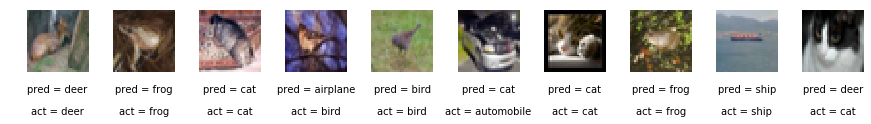

In [14]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
